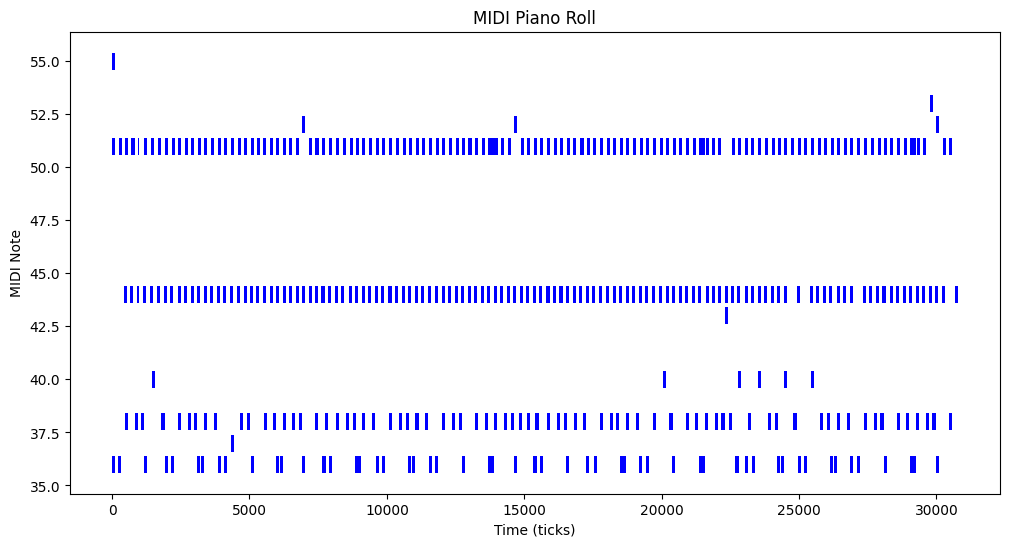

      time  note  velocity     type
0        3    55        60  note_on
1        7    51        55  note_on
2       10    36        64  note_on
3      115    55         0  note_on
4      118    51         0  note_on
..     ...   ...       ...      ...
815  30452    51        74  note_on
816  30559    38         0  note_on
817  30563    51         0  note_on
818  30658    44        25  note_on
819  30771    44         0  note_on

[820 rows x 4 columns]


In [4]:
import mido
import pandas as pd
import matplotlib.pyplot as plt

# Load MIDI
midi = mido.MidiFile("1_funk-groove1_138_beat_4-4_2.midi")

# Extract note events
events = []
time = 0
for track in midi.tracks:
    time = 0
    for msg in track:
        time += msg.time
        if msg.type in ["note_on", "note_off"]:
            events.append({
                "time": time,
                "note": msg.note,
                "velocity": msg.velocity if msg.type == "note_on" else 0,
                "type": msg.type
            })

df = pd.DataFrame(events)

# Build piano roll (note_on until note_off)
note_events = []
active_notes = {}

for _, row in df.iterrows():
    if row["type"] == "note_on" and row["velocity"] > 0:
        active_notes[row["note"]] = row["time"]
    elif (row["type"] == "note_off") or (row["type"] == "note_on" and row["velocity"] == 0):
        start = active_notes.pop(row["note"], None)
        if start is not None:
            note_events.append((start, row["time"], row["note"]))

# Plot piano roll
fig, ax = plt.subplots(figsize=(12,6))
for start, end, note in note_events:
    ax.broken_barh([(start, end-start)], (note-0.4, 0.8), facecolors="blue")

ax.set_xlabel("Time (ticks)")
ax.set_ylabel("MIDI Note")
ax.set_title("MIDI Piano Roll")
plt.show()
print(df)